# Adult Dataset

### Table of Contents

#### 1. **Information**
    - Reason for Choosing this Dataset ?**
    - Source
    - Details
    - Questionnaire
    - Objective

#### 2. **Loading Dataset**
    - Importing packages
    - Reading Data
    - Shape of data
    - Dtype

#### 3. **Data Pre-processing, Data Cleaning & EDA**
    - Merging Data
    - Checking Null values
    - Descriptive Statistics
    - Univariate Analysis
    - Bivariate Analysis
    - Encoding
    - Missing values imputation
    - Pearson Correlation
    - Normalization
    - Train-Test Split

#### 5. **Modelling**
    - Splitting Data
    - XGBoost Classifier
    - Metrics Evaluation
    - Hyper-Parameter Tuning
    - Metrics Evaluation
    - XGBoost api CV
    - XGBoost Final Dmatrix training
    - Metrics Evaluation
    - Test Prediction

#### 7. **What's next ?**<br><br>

### Reason for Choosing this Dataset ?

- The Reason behind choosing this model is my Personal Interest to explore various Domains out there.


- However, this Statistical models are not prepared to use for production environment.


### Source : 

- Download : https://archive.ics.uci.edu/ml/datasets/adult


### Details :

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) 

Prediction task is to determine whether a person makes over 50K a year. 


**Attribute Information :**

Listing of attributes: 

>50K, <=50K. 

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. 
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


### Questionnaire :

- How is the spread of each attribute in the given data set ?

- What is the ratio of Class >50K and Class <=50K ?

- Can we get subject count which earn >50K w.r.t their education, occupation, work class, etc ?

- And what more insights we can find from the exploration ?


### Objective :

- The goal is to make Analyze data and gain Meaningful Insights.


- End Goal is to built a predictive models using XGBoost and performing Hyperparamter tuning, Cross-Validation.

### Importing Packages

In [1]:
#importing modules
#installing XGBoost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install xgboost

In [2]:
#Reading the Datasets

#feature names
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']

train_df = pd.read_csv('adult_training.csv', names=col_labels)
test_df = pd.read_csv('adult_test.csv', names=col_labels)
train_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#Shape of training and test dataset

print ('No. of Records :', train_df.shape[0])
print ('No. of Records :', test_df.shape[0])

No. of Records : 32561
No. of Records : 16281


- We can see that our Train Dataset contains 32561 examples and Test Dataset contains 16281 examples.


- Further we'll merge dataset for Pre-processing.

### Data Pre-processing , Cleaning and EDA

In [4]:
#concat datasets for preprocessing 

df = pd.concat([train_df, test_df], axis=0)

#Shape of dataset
print ('No. of Records :', df.shape[0], '\nNo. of Features : ', df.shape[1])

No. of Records : 48842 
No. of Features :  15


- Now that we have merged data, we got 48842 samples and 15 Features (Including Target).

In [5]:
#exaimining datatypes

df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

- Above results shows us that we've :
    - **(6) x int64** datatype attributes
    - **(9) x Object** datatype attributes

In [6]:
#Examining Null values in each feature

df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

- Above Result shows us we've no missing values but we need to check the Data at granular level.

In [7]:
#descriptive stats

df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


- Above results shows us distribution of data for non-object attributes.


- Min. Age and Max. Age we have is between 17 to 90.


- Capital Gain has values ranging between 0 to 99999 while Capital loss has range of 0 to 4356.


- Hours per week has spread of Min. 1 Hour to Max. 99 Hours. We'll later Group Hours and see how that affects our Wage Class Attribute.

**Univariate Analysis :**

- Here we'll check individual attributes and gain insights from them.


- We'll plot some histograms and pie charts as they are better when we've categorical features.

Text(0.5, 1.0, 'Age Count')

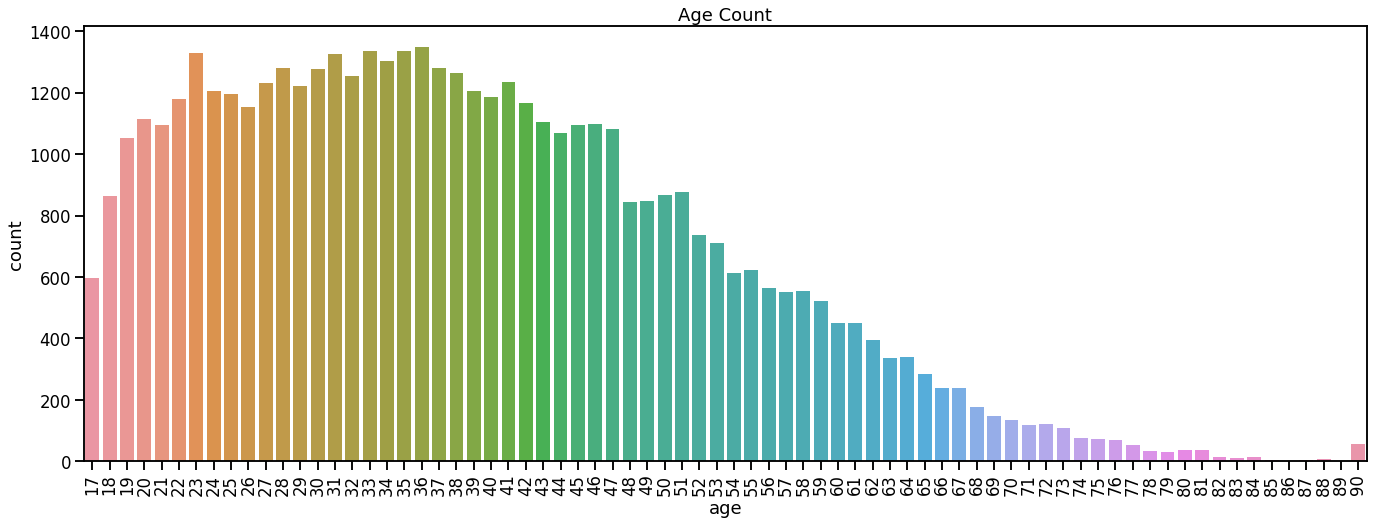

In [8]:
#plottig Age count

sns.set_context('talk')
plt.figure(figsize=(23, 8))
sns.countplot(df['age'])
plt.xticks(rotation=90)
plt.title('Age Count')

- Above plot depicts the Spread of Age.


- Subjects having age of 20 to 50 years are in majority. while subject >50 years we can observe the fall in records , it is because Majority of Aged Adults retire after 50+ of duty.

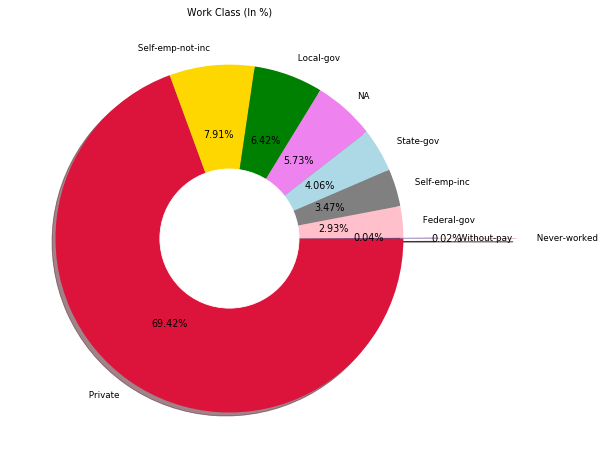

In [9]:
#work Class count

df['workclass'] = df['workclass'].replace(' ?', 'NA')

label = df.workclass.value_counts().index.values
color = ['crimson','gold', 'green', 'violet', 'lightblue', 'grey', 'pink', 'navy', 'maroon']

sns.set_context('paper')
plt.figure(figsize=(8,8))
plt.pie(df['workclass'].value_counts(), labels=label, autopct='%1.2f%%', explode=[0,0,0,0,0,0, 0,0.2,0.65], shadow=True, counterclock=False , colors=color 
       )
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Work Class (In %)')

df['workclass'] = df['workclass'].replace('NA', np.nan)

- Above Pie chart depicts Work Class.


- 69.42% , i.e, Majority of candidates work in Private Firm.


- 7.9% are Self-employed but Unincorporated self employment , i.e, Refers to people who work for themselves in other legal entities.


- 6.42% work for Local Govt, 4.06% work for State Govt. and 2.93% work for Federal Govt.


- 3.47% are Self-employed but incorporated self employment , i.e, Refers to people who work for themselves in corporate entities.


- While we've few Minorities, 0.04% Without Pay & 0.02% who never worked.


- We've NA of 5.73% , those are probably not recorded values, we'll consider them as NaN.

Text(0.5, 1.0, 'Count of Candidates by the Education')

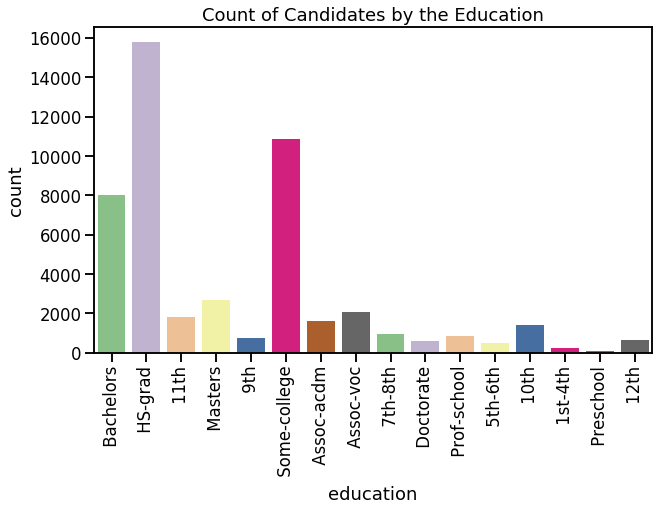

In [10]:
#plot education count

sns.set_context('talk')
plt.figure(figsize=(10, 6))
sns.countplot(df.education, palette='Accent')
plt.xticks(rotation=90)
plt.title('Count of Candidates by the Education')

- Education is Widespread attribute with dozens of categories.


- But We can clearly Identify Majority of candidates are High School Grad followed by College, Bachelors and Masters.

Text(0.5, 1.0, 'Marital Status (In %)')

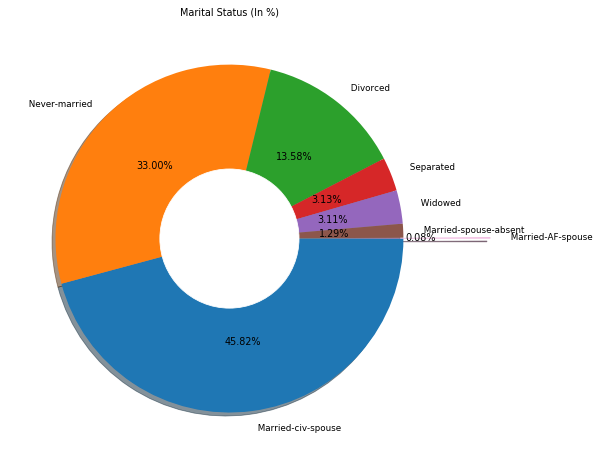

In [11]:
#Marital Status pie chart

label = df.marital_status.value_counts().index.values
#color = ['crimson','gold', 'green', 'violet', 'lightblue', 'grey', 'pink', 'navy', 'maroon']

sns.set_context('paper')
plt.figure(figsize=(8,8))
plt.pie(df['marital_status'].value_counts(), labels=label, autopct='%1.2f%%', explode=[0,0,0,0,0,0,0.5], shadow=True, counterclock=False , #colors=color 
       )
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Marital Status (In %)')

- Married-Civ-Spouse is 45.82% followed by 33% who never married.


- 13.58% of candidates are Divorced followed by 3.13% Separated and 3.11% Widowed.


- We've 1.29% as Married-Spouse-Absent and 0.08% as Married-AF-Spouse.


After some research I was able to find what those abbrevtions mean :

- **CIV** : Civilian
- **AF** : Armed Force
- **Absent** : Possibly death of Spouse.

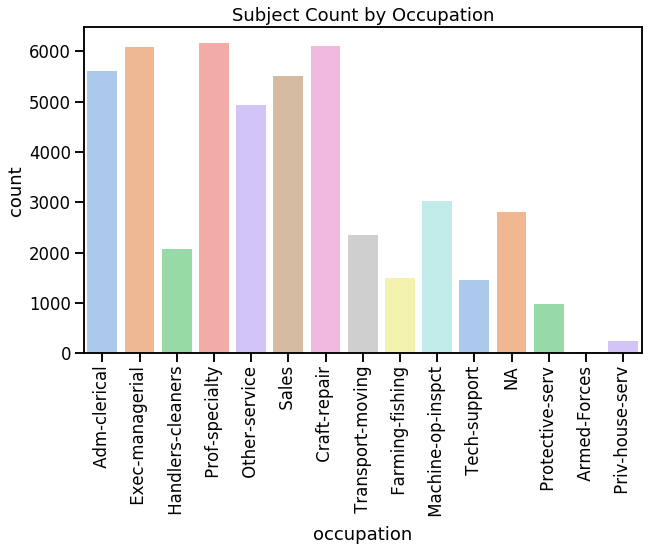

In [12]:
#Subject Count by Occupation

df['occupation'] = df['occupation'].replace(' ?', 'NA')

sns.set_context('talk')
plt.figure(figsize=(10, 6))
sns.countplot(df.occupation, palette='pastel')
plt.xticks(rotation=90)
plt.title('Subject Count by Occupation')

df['occupation'] = df['occupation'].replace('NA', np.nan)

- From Occupation attribute we can observe that some of the Occupations are dominant ones , few to name are Prof-speciality, Exec-Managerial, Craft-Repair, Adm-Clerical, Sales.


- We also have some NA , i.e, Missing Values.

Text(0.5, 1.0, 'Distribution of Capital Loss')

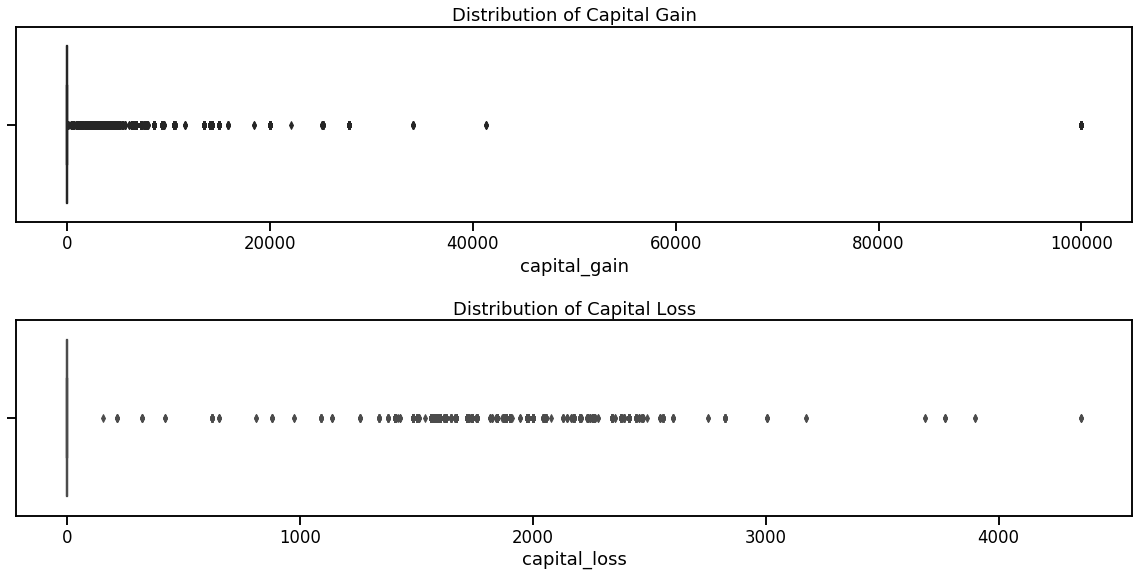

In [13]:
#distribution of capital gain & loss

sns.set_context('talk')
plt.figure(figsize=(20,9))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.subplot(2, 1, 1)
sns.boxplot(df.capital_gain, color='g')
plt.title('Distribution of Capital Gain')

plt.subplot(2, 1, 2)
sns.boxplot(df.capital_loss, color='b')
plt.title('Distribution of Capital Loss')

- About distribution of Capital Loss and Capital Gain we had already seen te range of the values previously.


- We've lot of outliers in this case.

Text(0.5, 1.0, 'Sex (In %)')

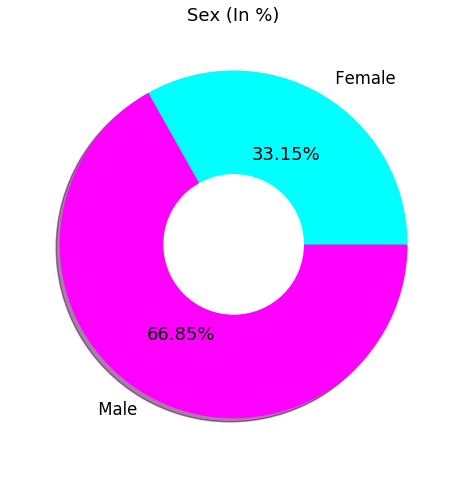

In [14]:
#Sex (in %) pie chart

plt.figure(figsize=(8,8))
plt.pie(df['sex'].value_counts(), labels=df['sex'].value_counts().index, autopct='%1.2f%%', shadow=True, counterclock=False , colors=['magenta', 'cyan'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sex (In %)')

- Above Pie chart shows us that we've 66.85% Males and 33.15% Females.

Text(0.5, 1.0, 'Wage Class (In %)')

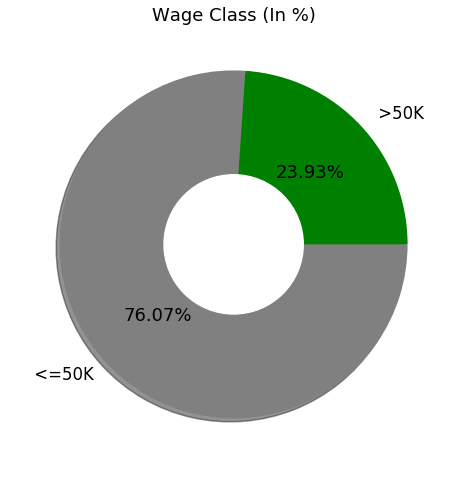

In [15]:
#Wage Class pie chart

df['wage_class'] = df['wage_class'].replace(' <=50K.', ' <=50K')
df['wage_class'] = df['wage_class'].replace(' >50K.', ' >50K')

plt.figure(figsize=(8,8))
plt.pie(df['wage_class'].value_counts(), labels=df['wage_class'].value_counts().index, autopct='%1.2f%%', shadow=True, counterclock=False , colors=['grey', 'green'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Wage Class (In %)')

- Pie chart of our Target Variable shows us that we've 23.93% candidates with Wage >50K while 76.07% who are <=50K.

In [0]:
#replacing ? with nan

df['native_country'] = df['native_country'].replace(' ?', np.nan)

In [17]:
#exaimining null values

df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
wage_class           0
dtype: int64

- Fnally we've Figured out missing values in our merged dataset by performing Univariate Analysis.


- Now, lets head over to Bivariate Analysis.

**Bivariate / Multi-variate Analysis :**


- From here on we'll link a variable to find more detail insights on our response variable.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Subject Count by Wage Class / Sex')

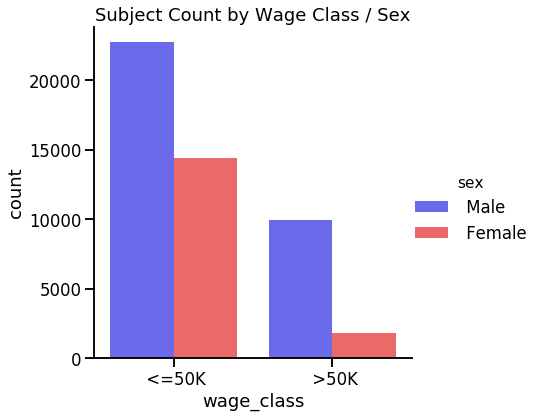

In [18]:
#count plot multivariate analysis

sns.catplot(x='wage_class', hue='sex', data=df, kind='count', palette='seismic', size=6, legend=True)
plt.title('Subject Count by Wage Class / Sex')

- Above Bar chart shows us how many Male / Females we've with respect to Wage Class.


- We've very few candidates who earn > 50K. In which Males count is around 10000 and Females count is somewhere around 2000.

In [0]:
#hours per week encoding

def hours_per_week_grouped(data):
  if data <= 20:
    return "0 to 20"
  if data > 20 and data <=40:
    return "21 to 40"
  if data > 40 and data <=60:
    return "41 to 60"
  if data > 60 and data <=80:
    return "61 to 80"
  else:
    return "81 to 100"
  
#applying encoder
df['enc_hours_per_week'] = df['hours_per_week'].apply(hours_per_week_grouped)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Subject Count by Wage Class w.r.t Hours Per week')

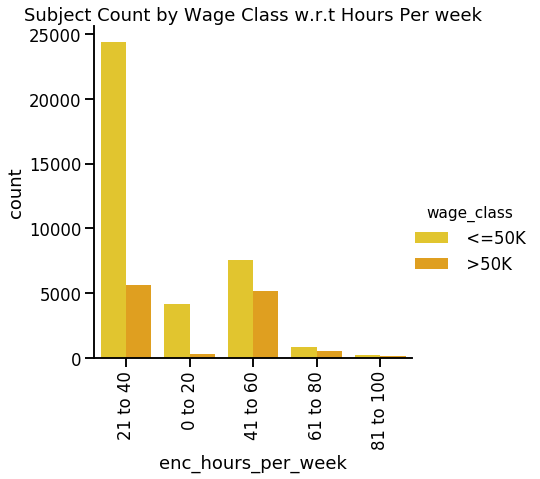

In [32]:
#count plot multivariate analysis

sns.catplot(x='enc_hours_per_week', hue='wage_class', data=df, kind='count', palette='Wistia', size=6, legend=True)
plt.xticks(rotation=90)
plt.title('Subject Count by Wage Class w.r.t Hours Per week')

- We can observe that most of the candidates are falling under 21 to 40 hours per week category.


- Followed by 41 to 60 hours Candidates.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

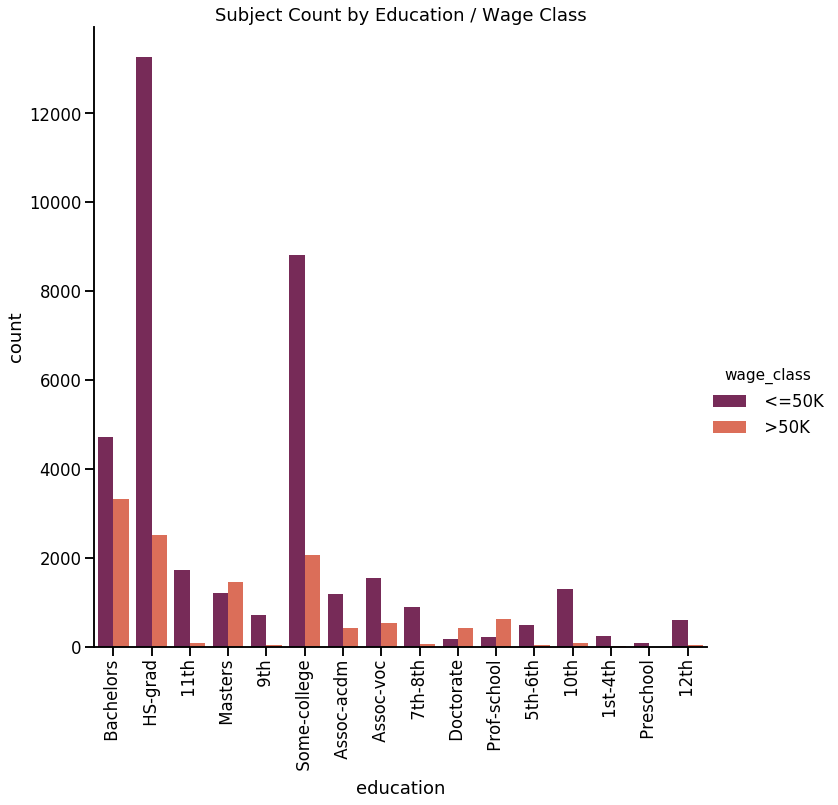

In [33]:
#count plot for multivariate analysis

sns.catplot(x='education', hue='wage_class', data=df, kind='count', palette='rocket', size=10, legend=True)
plt.title('Subject Count by Education / Wage Class')
plt.xticks(rotation=90)

.- Above we've bar plot which depicts Wage Class Education wise.


- Although High school grad are dominant candidates but in it majority of candidates have Wage Below or equals 50K while some 2500 candidates have wage above 50K , we need to look after their occupation.


- Further we've candidates with Bachelor degree in which Majority is earning <= 50K while some are > 50K , probably ones with experience.


- while in case of Doctorate and Masters Majority of candidates are earning well above 50K.

In [61]:
df[(df['wage_class'] == ' >50K') & (df['education'] == ' HS-grad')][['wage_class', 'education', 'occupation', 'workclass', 'hours_per_week', 'age']].head(15)

,wage_class,education,occupation,workclass,hours_per_week,age
7,>50K,HS-grad,Exec-managerial,Self-emp-not-inc,45,52
67,>50K,HS-grad,Adm-clerical,Private,40,53
84,>50K,HS-grad,Craft-repair,Private,40,44
86,>50K,HS-grad,Protective-serv,Local-gov,40,49
105,>50K,HS-grad,Craft-repair,Self-emp-inc,40,32
112,>50K,HS-grad,Other-service,Self-emp-not-inc,50,56
154,>50K,HS-grad,NaN,NaN,45,52
208,>50K,HS-grad,Sales,Self-emp-inc,35,58
211,>50K,HS-grad,Craft-repair,Private,40,37
246,>50K,HS-grad,Adm-clerical,Private,45,58


- We can observe that some candidates in 30s are earning >50K.


- Most probable reason could be their occupation, as u can see couple of them are Craft Repairers while one of them is working in Transport moving company meaning he must be getting Perks for deliveries.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

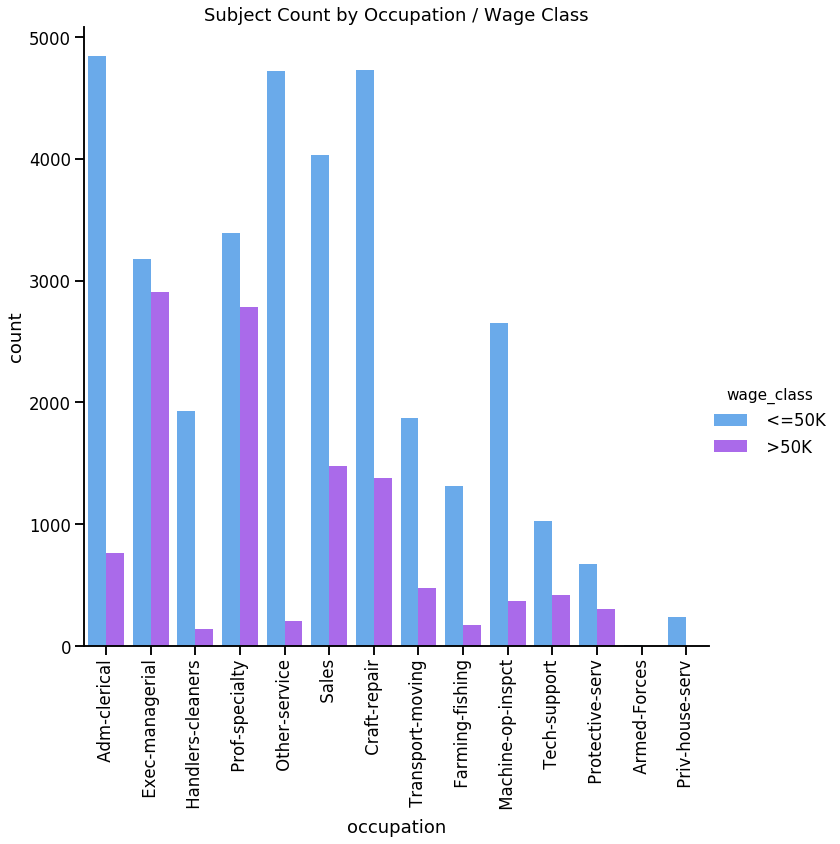

In [62]:
#count plot for multivariate analysis

sns.catplot(x='occupation', hue='wage_class', data=df, kind='count', palette='cool', size=10, legend=True)
plt.title('Subject Count by Occupation / Wage Class')
plt.xticks(rotation=90)

- Above plot depicts Candidates count : Wage Cass by Occupation.


- Interesting observations here are Executive / Managerial Level Candidates are most probably earning > 50K.


- same is the case with Professors.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

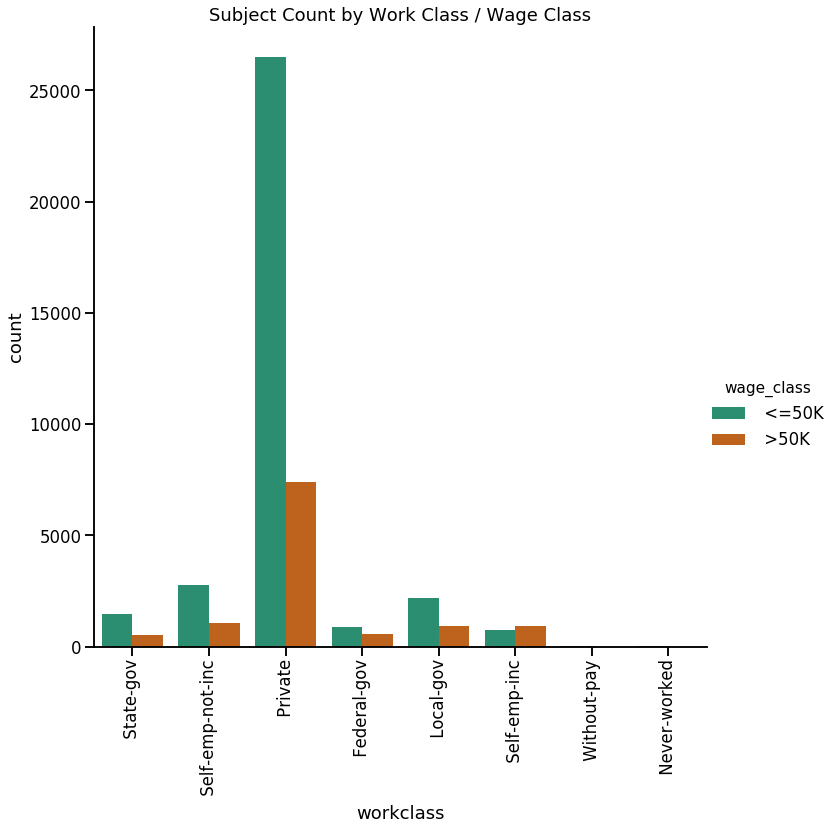

In [63]:
#count plot for multivariate analysis

sns.catplot(x='workclass', hue='wage_class', data=df, kind='count', palette='Dark2', size=10, legend=True)
plt.title('Subject Count by Work Class / Wage Class')
plt.xticks(rotation=90)

- Above bar plots depicts count of candiates with respect to Work class and Wage.


- Since we've more number of candidates working in Private firms we can see that they are ones dominating in our dataset , most of them earn above 50K.

In [0]:
#encoding features with missing values

#unique values to encode except null
workclass = np.delete(df['workclass'].unique(), 5, 0)
occ = np.delete(df['occupation'].unique(), 11,0)
nat_country = np.delete(df['native_country'].unique(), 4, 0)

#encoding by using replace function

df['workclass'].replace(workclass, np.arange(len(workclass)), inplace=True)
df['occupation'].replace(occ, np.arange(len(occ)), inplace=True)
df['native_country'].replace(nat_country, np.arange(len(nat_country)), inplace=True)

In [0]:
#Missing value imputation by median

df['workclass'].fillna(df['workclass'].median(), inplace=True)
df['occupation'].fillna(df['occupation'].median(), inplace=True)
df['native_country'].fillna(df['native_country'].median(), inplace=True)

In [0]:
#encoding remaining features with categorical values 

for feature in df.dtypes.index:
    if df[feature].dtypes == 'object':
        df[feature] = pd.Categorical(df[feature]).codes
        
#dropping hours per weekend grouped        
df.drop(df['hours_per_week_grouped'], axis=1, inplace=True)

In [0]:
'''#Let's fill NaN values now using FancyInput's IterativeImputer

from fancyimpute import IterativeImputer

df_filled = pd.DataFrame(data=IterativeImputer(imputation_order='roman', n_iter=100, initial_strategy='median').fit_transform(df.values), columns=df.columns, index=df.index)
df_filled['wage_class'] = df['wage_class'].astype('int')
df_filled.head()'''

"#Let's fill NaN values now using FancyInput's IterativeImputer\n\nfrom fancyimpute import IterativeImputer\n\ndf_filled = pd.DataFrame(data=IterativeImputer(imputation_order='roman', n_iter=100, initial_strategy='median').fit_transform(df.values), columns=df.columns, index=df.index)\ndf_filled['wage_class'] = df['wage_class'].astype('int')\ndf_filled.head()"

In [0]:
#making copy of dataframe

df_filled = df.copy()

In [0]:
#examining null values

df_filled.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation        False
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country    False
wage_class        False
dtype: bool

Text(0.5, 1.0, 'Pearson Correlation')

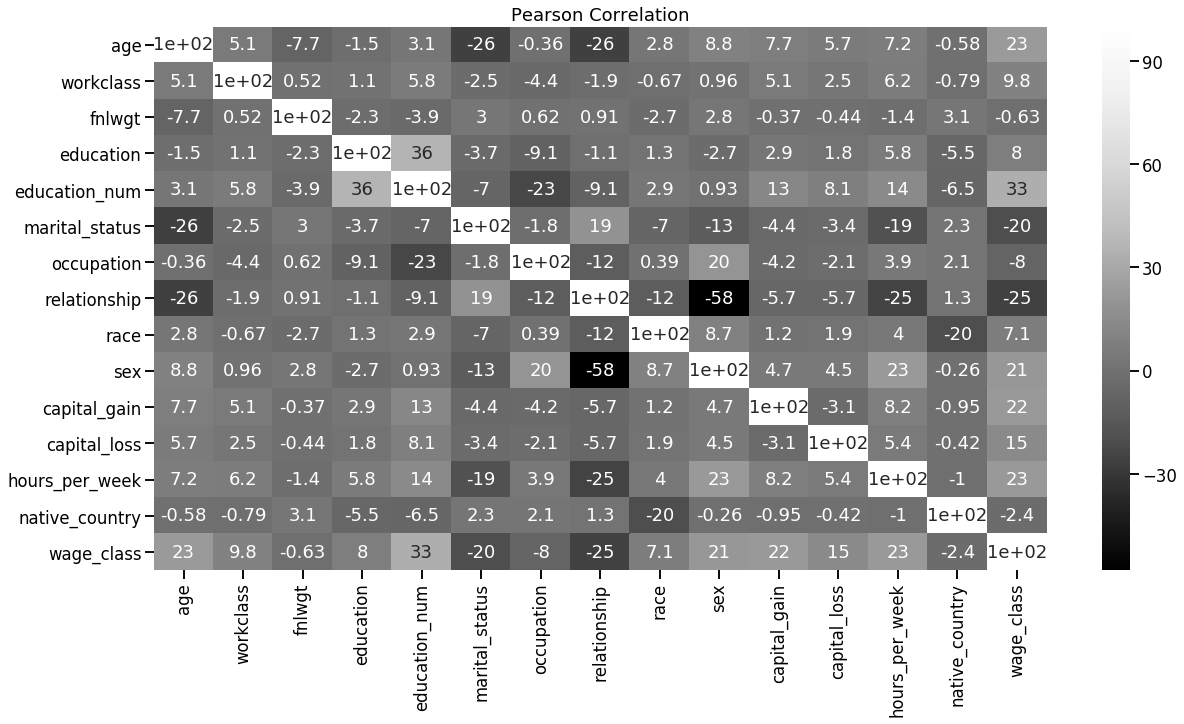

In [0]:
#correlation plot

plt.figure(figsize=(20,10))
sns.heatmap(df_filled.corr()*100, square=False, annot=True, cmap='Greys_r')
plt.title('Pearson Correlation')

- Above is correlation plot which is scaled to 0 - 100.


- Strong correlation is considered as above 70 or -70.


- We can see that Relationship and Sex is somewhat negatively correlation.

In [0]:
#Let's scale our values

from sklearn.preprocessing import StandardScaler

target = df_filled['wage_class'][:train_df.shape[0]]   #target 

cols = df_filled.drop('wage_class', axis=1).columns

scaler = StandardScaler()

norm_df = scaler.fit_transform(df_filled.drop('wage_class', axis=1).values)
norm_df = pd.DataFrame(data=norm_df, columns=cols, index=df_filled.index)

- Now, we had scaled our values using Standard Scaler / Standardization technique.


- We can try various techniques to Normalize data like MinMax, Normalization, etc.

In [0]:
#Let's split train and test data

train_data = norm_df[:train_df.shape[0]]
test_data = norm_df[train_df.shape[0]:]

print ('Shape of Training Set : ',train_data.shape)
print ('Shape of Testing Set : ',test_data.shape)

Shape of Training Set :  (32561, 14)
Shape of Testing Set :  (16281, 14)


- Above we had split data to train and test set. 


- Next up, we need to split Training set into 20% validation set.

In [0]:
from xgboost import XGBClassifier, cv, DMatrix, train, plot_importance
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, auc, roc_curve

x_train, x_test, y_train, y_test = train_test_split(train_data, target, test_size=0.2, random_state=10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((26048, 14), (6513, 14), (26048,), (6513,))

- Now, we've 26048 examples for training set.


- 6513 examples for validation.


- Our goal is to only use XGBoost Classifier and to understand it in more detail.

### XGBoost Classifier


- XGBoost is successor to Gradient boost as it is developed to overcome problems which Gradient Boost has , i.e, Speed & Peformance.


- As XGBoost is based on Gradient Boosting it is sensitive to Learning Rate. Large steps may lead to high error rate because it will miss the Global Minima.


- One of the interesting fact about XGBoost is that it contains Regularization parameter which is a penalty added for data with Large Bias and Large Variance, so XGBoost kind of reduces the magnitude / weights of features as per requirements which also helps in prevention of Over-fitting.


- It supports both types of Regularization , L1 (Lasso) and L2 (Ridge). So it is also doing a role of Feature Selection / Elimination.


![alt_text](https://image.slidesharecdn.com/xgboost-171216133814/95/introduction-of-xgboost-18-638.jpg?cb=1513431811)


- It also has the functionality of handling missing values internally. Since, we had imputed missing values by median already we will just build our statistical modeling.


- One more advantage of XGBoost is we can continue to train our model from the point we left.


- We can also sub-sample our data , its similar to batch training which is a geature from Stochastic Gradient Descent.

In [0]:
#xgb with by default parameters 

xgb_est = XGBClassifier().fit(x_train, y_train)
pred = xgb_est.predict(x_test)
pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int8)

Accuracy Score : 0.8552126516198373
Cross Validation Score :  0.8640586312326907
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4929
           1       0.78      0.57      0.66      1584

    accuracy                           0.86      6513
   macro avg       0.82      0.76      0.78      6513
weighted avg       0.85      0.86      0.85      6513



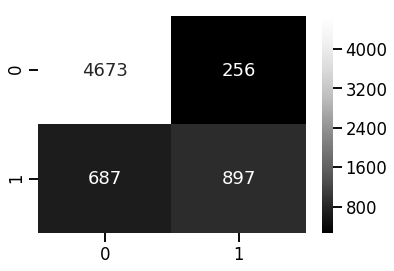

In [0]:
#Metrics Evaluation

print ('Accuracy Score :', accuracy_score(y_test, pred))
print ('Cross Validation Score : ', cross_val_score(xgb_est, x_train, y_train, cv=5).mean())
print (classification_report(y_test, pred))

sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Greys_r', fmt='d')

- So we had implemented XGBoost with its default parameters.


- Approaching model building process with by default parameters is always a best way at first to examine the Accuracy or other metrics.


- With default Parameters in the hood we are able to achieve 85.52% accuracy which is better.


- One thing to notice is Recall Score, it is less for Class 1. And its evident after viewing Confusion Matrix that there are 687 examples Misclassified as <=50K but they are actually >50K. This is **Type-1 error** in our case

### Hyper-Parameter Tuning


- In this section our main focus is to get best out of our model.

In [0]:
#hyper parameter tuning

params = {'max_depth':[3,5,7], 'n_estimators':[500, 1000],
          'min_child_weight':[1,3], 'subsample':[0.5,0.8]}

param_tuning = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1), param_grid=params, scoring='accuracy', cv=5)
param_tuning.fit(x_train, y_train)
param_tuning.best_params_

{'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 500, 'subsample': 0.8}

- We'll do Hyper Parameter for XGBoost using Sklearn's Grid Search CV.


- At times tuning process can be time consuming and computationally expensive so it is better to tune few parameters and evaluate model.


- In our case we'll tune Max. depth , No. of Estimators , Min. child weight and Subsample And then evaluate model's performance. 


- As we can see the best parameters resulted by Grid Search CV are **'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 500, 'subsample': 0.8**

Accuracy Score : 0.8651926915399969
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4929
           1       0.77      0.64      0.70      1584

    accuracy                           0.87      6513
   macro avg       0.83      0.79      0.80      6513
weighted avg       0.86      0.87      0.86      6513



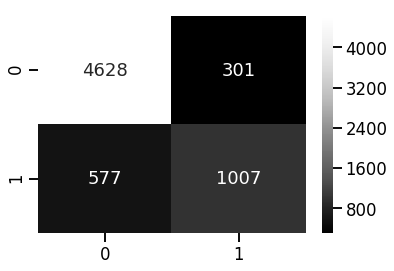

In [0]:
p_pred = param_tuning.predict(x_test)

#Metrics Evaluation
print ('Accuracy Score :', accuracy_score(y_test, p_pred))
print (classification_report(y_test, p_pred))
sns.heatmap(confusion_matrix(y_test, p_pred), annot=True, cmap='Greys_r', fmt='d')

- We can observe above that how Accuracy boosted a bit by ~1%.


- Although Accuracy isn't that important as it can be a illusion when dataset is imbalanced, in such cases model might learn very well to predict only one class while doing Mis-classification on minority class.


- In our case, the ratio of response variable is ~75:25 , so our dataset is somewhat imbalanced / biased towards <=50K class.


- But after Parameter tuning we got accuracy 86.51% , just 1% increment in accuracy post-XgBoost trained on default Parameters.


- Even 1% makes a lot difference , it is evident from Confusion Matrix, we can see the Mis-classification count for Class 1 (0>50K) has dropped to 577 from 687 (Previous Model).


- Grid Search CV also supports Feature Importance which can give is brief idea about which feature our model is giving more importance to.

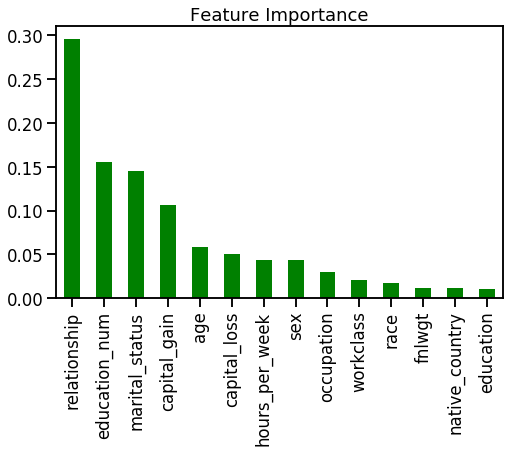

In [0]:
feature_imp = pd.DataFrame(data=param_tuning.best_estimator_.feature_importances_, index=x_train.columns.values, columns=['Feature_Importance'])
feature_imp.sort_values(by='Feature_Importance', ascending=False).plot(kind='bar', legend=False, color='green', title='Feature Importance', figsize=(8,5))

- Above Bar chart shows us how much importance is given to our feature. 


- Surprisingly, "Relationship" is given top most priority in predicting if candidate will earn >50K , Followed by "education_num", "marital_status", etc.


- In other words more weightage is given to "Relationship".

### XGBoost built-in Cross Validation


- XGBoost api also has built in Cross Validation.


- It is trained on DMatrix (Data Matrix) which is internal data structure specifically designed for XGBoost so that it would be memory efficient and fast.


- We'll use our best parameters which Grid Search CV gave us.


- Also we'll use early stopping to prevent algorithm from over-fitting.


- We'll use 5 fold Cross validation, It will split our data in 5 sets and train 4 models iteratively to predict on 5th model.

In [0]:
#creating a dmatrix for xgb cross-validation

params_1 = {'max_depth': 3, 'min_child_weight': 3, 'subsample': 0.8, 'seed':0}

dmat = DMatrix(x_train, y_train)

cross_val = cv(params=params_1, dtrain=dmat, nfold=5, num_boost_round=2500, metrics=['error'],early_stopping_rounds=300, shuffle=True)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [0]:
#exaining test-train error

cross_val.tail()

,train-error-mean,train-error-std,test-error-mean,test-error-std
326,0.104413,0.000632,0.129914,0.002680
327,0.104404,0.000703,0.129684,0.002901
328,0.104308,0.000757,0.129837,0.003031
329,0.104106,0.000743,0.129530,0.002728
330,0.104192,0.000849,0.129453,0.002547


- There is a slight over-fitting in this case at round 330, train error is 0.1041% (89.59% Training Accuracy) while test error 0.1294% (87.06% Test Accuracy).


- Appox. 2% difference in Train-Test Accuracy is acceptable.


- Let us train the model again for 320-330 Iterations, we might get good results. But again, Accuracy is not the metrics to rely on.

In [0]:
#setting final estimator

final_xgb = train(params_1, dmat, num_boost_round=328)
final_pred = final_xgb.predict(DMatrix(x_test))

#converging prediction to binary
final_pred[final_pred > 0.5] = 1
final_pred[final_pred <= 0.5] = 0
final_pred

array([0., 0., 1., ..., 0., 0., 0.], dtype=float32)

- XGBoost outputs probabilities, we need to covert them into Binary outputs.

Accuracy Score : 0.8654997696913864
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4929
           1       0.79      0.61      0.69      1584

    accuracy                           0.87      6513
   macro avg       0.84      0.78      0.80      6513
weighted avg       0.86      0.87      0.86      6513



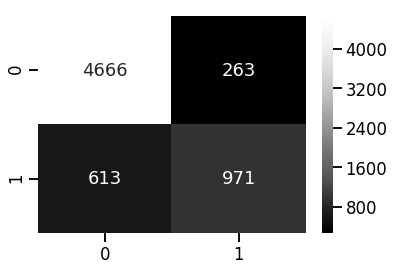

In [0]:
#Metrics Evaluation
print ('Accuracy Score :', accuracy_score(y_test, final_pred))
print (classification_report(y_test, final_pred))
sns.heatmap(confusion_matrix(y_test, final_pred), annot=True, cmap='Greys_r', fmt='d')

- We had got good accuracy score but recall for Class 1 has decreased compared to previous Parameter Tuned model.


- Previously Recall for Class 1 was 64, now its 61.


- Anyway, let us also look at feature importance.

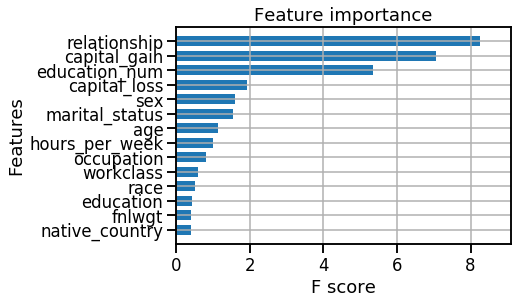

In [0]:
#feature importance

sns.set_context('talk')
plot_importance(final_xgb, height=.7, importance_type='gain', show_values=False)

- Here as well the model gave more importance to "Relationships" but unlike previous model, here we got more importance to "Capital gain" as well.

### ROC-AUC

- ROC-AUC is metrics to consider the performance of model. It gives a much better insight compared to Confusion Matrix or Accuracy Score.


- ROC-AUC combines T.P.R (True Positive Rate) & F.P.R (False Positive Rate) to build up summary picture of Classification.


- The ROC-AUC score is based on probabilities. To construct curve we need probabilities.


- We have threshold for this , by default threshold is 0.5. P-value above 0.5 will be classified as 1 while P-value equals or below 0.5 will be classified as 0.


- AUC value close to 1 is considered as better. The higher the value better the Classifier.

Text(0.5, 1.0, 'Receiver Operating Characteristic - Area Under Curve (ROC-AUC)')

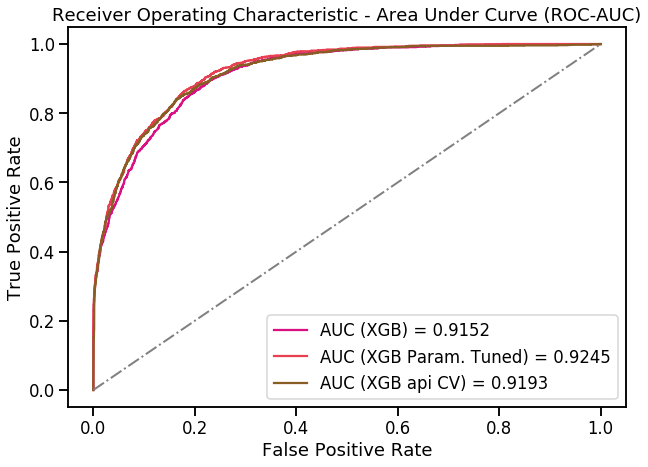

In [0]:
#Roc-Auc

xgb_prob_xgb = xgb_est.predict_proba(x_test)
sklearn_tuned_prob = param_tuning.predict_proba(x_test)
xgb_api_cv_prob = final_xgb.predict(DMatrix(x_test))

fpr, tpr, _ = roc_curve(y_test, xgb_prob_xgb[:,1])
fpr_xgb_tuned, tpr_xgb_tuned, _ = roc_curve(y_test, sklearn_tuned_prob[:,1])
fpr_xgb_cv, tpr_xgb_cv, _ = roc_curve(y_test, xgb_api_cv_prob)

xgb_roc_auc = auc(fpr, tpr)
xgb_tuned_roc_auc = auc(fpr_xgb_tuned, tpr_xgb_tuned)
xgb_cv_roc_auc = auc(fpr_xgb_cv, tpr_xgb_cv)

sns.set_context('talk')
plt.figure(figsize=(10,7))

plt.plot(fpr, tpr, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='AUC (XGB) = %0.4f'% xgb_roc_auc)
plt.plot(fpr_xgb_tuned, tpr_xgb_tuned, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='AUC (XGB Param. Tuned) = %0.4f'% xgb_tuned_roc_auc)
plt.plot(fpr_xgb_cv, tpr_xgb_cv, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='AUC (XGB api CV) = %0.4f'% xgb_cv_roc_auc)

plt.plot([0,1], 'grey', lw=2, linestyle='-.')

plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic - Area Under Curve (ROC-AUC)')

- We get better picture of our all the classifiers now that we have built, we can observe that Parameter tuned model gives us Score of 92.45%. And thats the Model we will opt for.


- Let us predict on test set with our parameter tuned model.


- With that we conclude our XGBoost Case Study.

In [0]:
#predicting on test data by sklearn's parametered tuned model

test_pred = param_tuning.predict(test_data)
test_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int8)

### What's next ?

- We can also try to add more Parameters for Tuning the model.


- One can also try to fill missing values by various ways.